In [2]:
import sys
sys.path.append("..")
from src.data.load_data import load_data
from src.data.clean_data import data_info
from src.data.clean_data import replace_empty_string
from src.data.clean_data import drop_unused_columns
from src.data.clean_data import duplicated_rows
from src.data.clean_data import drop_duplicated_rows
from src.data.clean_data import check_missing_values
from src.data.clean_data import check_value_counts
from src.data.clean_data import change_to_numeric
from src.data.clean_data import check_number_of_unique_values
from src.data.split_data import split_data
from src.data.eda import data_summary
from src.data.eda import plot_histogram_for_numeric_columns
from src.data.eda import  boxplot_for_numeric_columns
from src.data.eda import  plot_heatmap_correlation
from src.data.preprocess import impute_missing_values
from src.data.preprocess import onehotencoding
from src.data.preprocess import standard_scaling
from src.data.preprocess import impute_missing_values_for_non_train_set
from src.data.preprocess import onehotencoding_for_non_train_set
from src.data.preprocess import standard_scaling_for_non_train_set
from src.data.split_data import split_features_target
from src.models.train import run_baseline_model
from src.models.train import build_baseline_model



In [3]:
df = load_data("../data/raw/Telco_customer_churn.xlsx")
df.head()


df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df = drop_unused_columns(df, ['Country', 'Zip Code', 'State', 'City', 'CustomerID', 'Longitude', 'Latitude', 'Lat Long', 'Count', 'Churn Label', 'Churn Score', 'Churn Reason', 'CLTV'])

df.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [5]:
data_info(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [6]:
replace_empty_string(df)

data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

c:\Users\hp\Desktop\telecom-churn-prediction\notebooks\..\src\data\clean_data.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(r'^\s*$', np.nan, regex=True)


In [7]:
duplicated_rows(df)

np.int64(22)

In [8]:
df = drop_duplicated_rows(df)

duplicated_rows(df)

np.int64(0)

In [9]:
change_to_numeric(df, 'Total Charges')

<class 'pandas.core.series.Series'>
Index: 7021 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype  
--------------  -----  
7010 non-null   float64
dtypes: float64(1)
memory usage: 109.7 KB


In [10]:
check_missing_values(df)

Total Charges    11
dtype: int64

In [11]:
train_df, val_df, test_df = split_data(df)

print('train set',train_df.shape)
print('validation set', val_df.shape)
print('test set', test_df.shape)



train set (4212, 20)
validation set (1404, 20)
test set (1405, 20)


In [12]:
check_value_counts(train_df)

Gender
Male      2123
Female    2089
Name: count, dtype: int64
****************************************
Senior Citizen
No     3533
Yes     679
Name: count, dtype: int64
****************************************
Partner
No     2143
Yes    2069
Name: count, dtype: int64
****************************************
Dependents
No     3234
Yes     978
Name: count, dtype: int64
****************************************
Phone Service
Yes    3790
No      422
Name: count, dtype: int64
****************************************
Multiple Lines
No                  2009
Yes                 1781
No phone service     422
Name: count, dtype: int64
****************************************
Internet Service
Fiber optic    1861
DSL            1432
No              919
Name: count, dtype: int64
****************************************
Online Security
No                     2083
Yes                    1210
No internet service     919
Name: count, dtype: int64
****************************************
Online Backup
No

In [13]:
check_missing_values(train_df)

Total Charges    6
dtype: int64

In [14]:
data_summary(train_df)

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,4212.000000,4212.000000,4206.000000,4212.000000
mean,32.553894,64.670157,2277.299263,0.265195
std,24.551415,30.177308,2256.088621,0.441489
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,34.700000,397.387500,0.000000
50%,29.000000,70.400000,1405.325000,0.000000
75%,56.000000,89.850000,3756.450000,1.000000
max,72.000000,118.600000,8684.800000,1.000000


In [15]:
group_churn = train_df.groupby('Churn Value')

data_summary(group_churn)

Tenure Months                                                     \
                    count       mean        std  min   25%   50%   75%   max   
Churn Value                                                                    
0                  3095.0  37.950242  24.040947  0.0  15.0  39.0  61.0  72.0   
1                  1117.0  17.601611  19.171592  1.0   2.0  10.0  27.0  72.0   

            Monthly Charges             ...               Total Charges  \
                      count       mean  ...   75%     max         count   
Churn Value                             ...                               
0                    3095.0  61.261696  ...  88.8  118.60        3089.0   
1                    1117.0  74.114369  ...  94.0  118.35        1117.0   

                                                                              
                    mean          std   min     25%     50%      75%     max  
Churn Value                                                                   
0            2561.762625  2322.576895  18.8  587.45  1685.9  4295.35  8594.4  
1            1490.632005  1846.282641  19.1  137.60   713.0  2196.15  8684.8  

[2 rows x 24 columns]

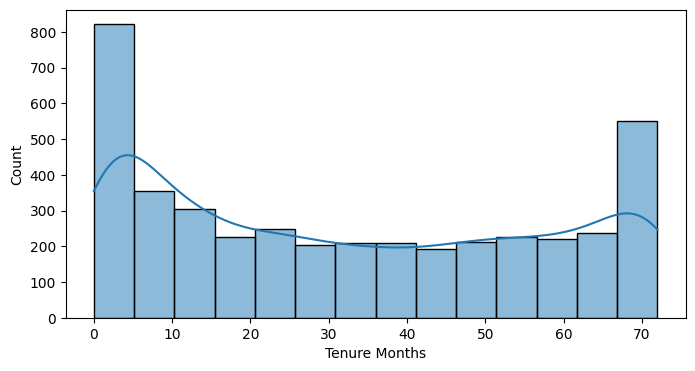

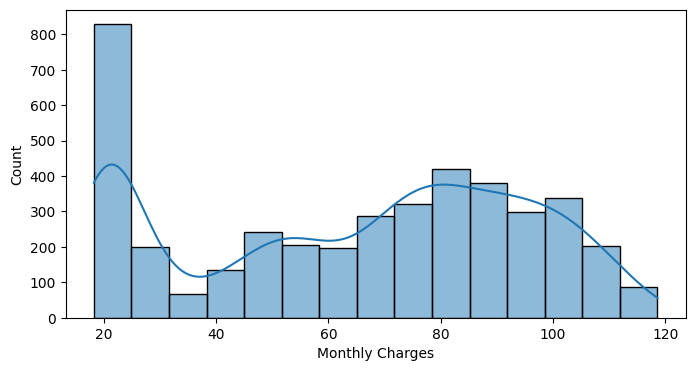

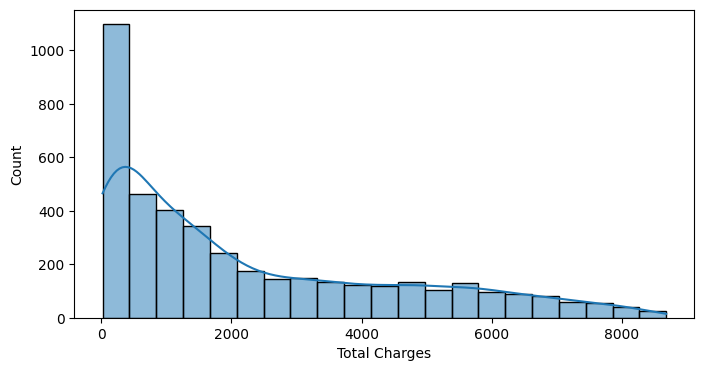

In [16]:
# Visualizing the distribution of numerical columns using histograms

plot_histogram_for_numeric_columns(train_df)

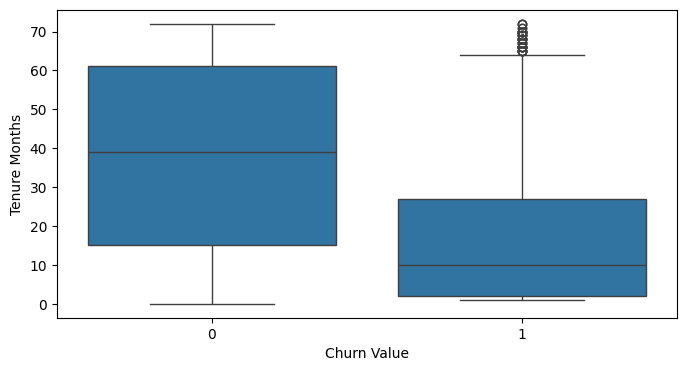

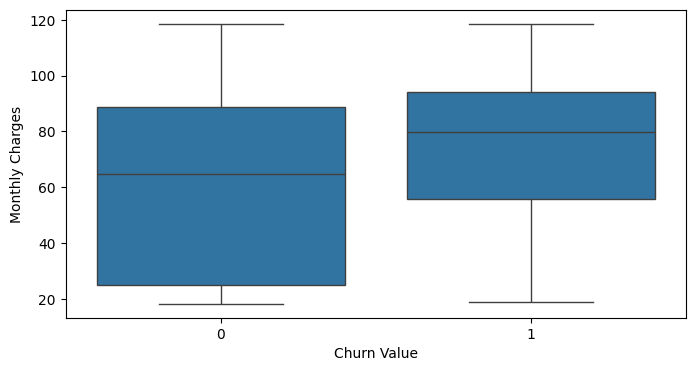

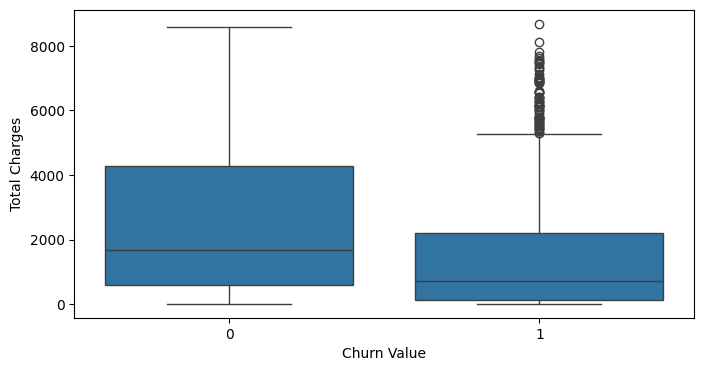

In [17]:
# Visualizing the relationship between the numerical column and the target value (Churn Value) using boxplot


boxplot_for_numeric_columns(train_df)

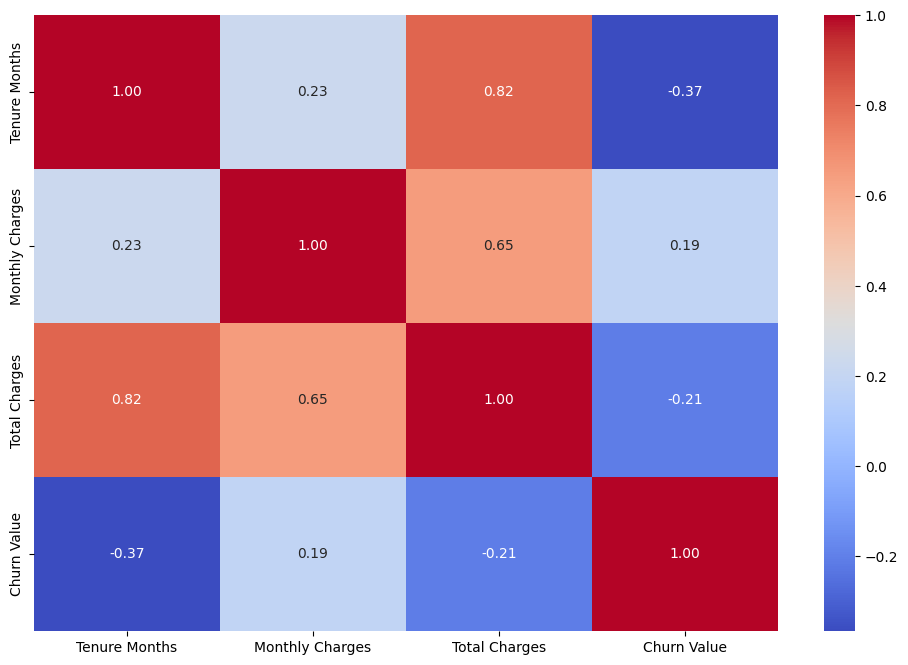

In [18]:
# Visualizing the correlation between the numerical columns using a heatmap


plot_heatmap_correlation(train_df)

In [19]:
check_missing_values(train_df)

Total Charges    6
dtype: int64

In [20]:
impute_missing_values(train_df, ['Total Charges'])

In [21]:
check_missing_values(train_df)

No missing values found in the DataFrame.


In [22]:
check_number_of_unique_values(train_df)

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

In [23]:
train_df = onehotencoding(train_df)


In [24]:
train_df.shape

(4212, 47)

In [25]:
standard_scaling(train_df)

,Tenure Months,Monthly Charges,Total Charges
6908,0.221851,1.001860,0.594465
4886,1.280979,1.142711,1.727755
4188,-0.715070,1.228879,-0.269093
6646,1.280979,0.294291,1.103568
4042,1.606864,1.102941,2.146061


In [26]:
impute_missing_values_for_non_train_set(val_df, ['Total Charges'])

check_missing_values(val_df)

No missing values found in the DataFrame.


In [27]:
val_df = onehotencoding_for_non_train_set(val_df)


In [28]:
standard_scaling_for_non_train_set(val_df)

,Tenure Months,Monthly Charges,Total Charges
4628,-1.244634,0.231322,-0.949369
1305,-1.285370,-0.681724,-0.990022
5431,-0.429920,0.609134,-0.211474
1748,0.221851,1.336588,0.776394
3328,1.606864,0.534566,1.531410


In [29]:
impute_missing_values_for_non_train_set(test_df, ['Total Charges'])
check_missing_values(test_df)

No missing values found in the DataFrame.


In [30]:
test_df = onehotencoding_for_non_train_set(test_df)

In [31]:
standard_scaling_for_non_train_set(train_df)

,Tenure Months,Monthly Charges,Total Charges
6908,-1.317068,-2.110058,-1.009319
4886,-1.273924,-2.105390,-1.008816
4188,-1.355234,-2.102534,-1.009702
6646,-1.273924,-2.133507,-1.009093
4042,-1.260648,-2.106708,-1.008631


In [32]:

X_train, y_train = split_features_target(train_df)

print("X_train set", X_train.shape)
print("y_train set", y_train.shape)

X_train set (4212, 46)
y_train set (4212,)


In [33]:
X_val, y_val = split_features_target(val_df)

print("X_val set", X_val.shape)
print("y_val set", y_val.shape)

X_val set (1404, 46)
y_val set (1404,)


In [34]:
X_test, y_test = split_features_target(test_df)

print("X_test set", X_test.shape)
print("y_test set", y_test.shape)

X_test set (1405, 46)
y_test set (1405,)


In [35]:
baseline_model = run_baseline_model(X_train, y_train, X_val, y_val)

baseline_model

{'AUC-ROC': 0.7761916669185515,
 'Classification Report': {'0': {'precision': 0.7735294117647059,
   'recall': 0.9915174363807728,
   'f1-score': 0.8690623709211069,
   'support': 1061.0},
  '1': {'precision': 0.7954545454545454,
   'recall': 0.10204081632653061,
   'f1-score': 0.18087855297157623,
   'support': 343.0},
  'accuracy': 0.7742165242165242,
  'macro avg': {'precision': 0.7844919786096256,
   'recall': 0.5467791263536517,
   'f1-score': 0.5249704619463416,
   'support': 1404.0},
  'weighted avg': {'precision': 0.7788857656504715,
   'recall': 0.7742165242165242,
   'f1-score': 0.700937691749676,
   'support': 1404.0}}}

In [36]:
model = build_baseline_model()

model.fit(X_train, y_train)

val_analysis = X_val.copy()
val_analysis['actual'] = y_val
val_analysis['predicted'] = model.predict(X_val)
val_analysis['predict_proba'] = model.predict_proba(X_val)[:,1]

val_analysis

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
4628,-1.244634,0.231322,-0.949369,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,2.408933e-01
1305,-1.285370,-0.681724,-0.990022,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,4.371605e-01
5431,-0.429920,0.609134,-0.211474,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1.343533e-02
1748,0.221851,1.336588,0.776394,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,4.503531e-04
3328,1.606864,0.534566,1.531410,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1.033370e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.918748,0.506396,-0.629358,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1.869354e-01
3529,-0.878013,0.155097,-0.693653,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,9.222006e-02
6104,-0.185506,-1.291526,-0.683739,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,4.751985e-04
2050,-0.674334,-1.488718,-0.883455,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,6.386351e-04


In [44]:
val_analysis.columns.tolist()

['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Gender_Female',
 'Gender_Male',
 'Senior Citizen_No',
 'Senior Citizen_Yes',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'Phone Service_No',
 'Phone Service_Yes',
 'Multiple Lines_No',
 'Multiple Lines_No phone service',
 'Multiple Lines_Yes',
 'Internet Service_DSL',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No',
 'Online Security_No internet service',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_No internet service',
 'Online Backup_Yes',
 'Device Protection_No',
 'Device Protection_No internet service',
 'Device Protection_Yes',
 'Tech Support_No',
 'Tech Support_No internet service',
 'Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_No internet service',
 'Streaming TV_Yes',
 'Streaming Movies_No',
 'Streaming Movies_No internet service',
 'Streaming Movies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'Paperless 

In [ ]:
false_negative = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 0)]

false_positive = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 1)]

true_positive = val_analysis[(val_analysis['actual'] == 1) & (val_analysis['predicted'] == 1)]

true_negative = val_analysis[(val_analysis['actual'] == 0) & (val_analysis['predicted'] == 0)]


In [ ]:
features = [
  'Tenure Months', 'Monthly Charges', 'Total Charges', 'Multiple Lines_Yes', 'Contract_Month-to-month',
]


In [40]:
false_positive.head()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
2265,-1.244634,0.506396,-0.932203,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.548016
5177,-1.285370,0.188238,-0.978378,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.570368
4453,-1.244634,0.153440,-0.941362,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.543085
5657,-1.285370,0.814611,-0.969995,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.655820
1993,-1.244634,0.166696,-0.949613,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.530532


In [41]:
false_negative.head()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
1305,-1.285370,-0.681724,-0.990022,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,4.371605e-01
1748,0.221851,1.336588,0.776394,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,4.503531e-04
1732,0.384794,1.328303,0.908155,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,1.302348e-04
1661,1.403186,1.707772,2.429078,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1.630667e-08
272,-1.122427,-0.834175,-0.916101,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,2.235705e-01


In [38]:
false_negative.describe()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,...,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.0,308.0,3.080000e+02
mean,-0.492346,0.344379,-0.222653,0.525974,0.474026,0.711039,0.288961,0.610390,0.389610,0.931818,...,0.029221,0.233766,0.766234,0.155844,0.139610,0.500000,0.204545,1.0,0.0,1.262741e-01
std,0.809277,0.820836,0.872387,0.500137,0.500137,0.454017,0.454017,0.488455,0.488455,0.252468,...,0.168699,0.423914,0.423914,0.363298,0.347146,0.500814,0.404025,0.0,0.0,1.504471e-01
min,-1.285370,-1.513574,-1.000955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.630667e-08
25%,-1.163162,-0.336639,-0.911837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,8.097051e-04
50%,-0.857645,0.518824,-0.619566,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.0,0.0,4.960645e-02
75%,0.018172,1.013459,0.245500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,2.386003e-01
max,1.566129,1.707772,2.475076,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,4.956980e-01


In [39]:
false_positive.describe()

,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,actual,predicted,predict_proba
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,...,9.0,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.000000
mean,-1.262739,0.446741,-0.954080,0.555556,0.444444,0.777778,0.222222,0.777778,0.222222,1.0,...,0.0,0.111111,0.888889,0.0,0.0,1.0,0.0,0.0,1.0,0.572183
std,0.029594,0.316948,0.030056,0.527046,0.527046,0.440959,0.440959,0.440959,0.440959,0.0,...,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.045759
min,-1.285370,0.153440,-0.978444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.512841
25%,-1.285370,0.183267,-0.976271,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.543085
50%,-1.285370,0.345660,-0.969995,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.570368
75%,-1.244634,0.660503,-0.941362,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.0,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.582909
max,-1.203898,1.001860,-0.888400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,0.0,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.655820


In [41]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_val, model.predict(X_val))
matrix

array([[1052,    9],
       [ 308,   35]])

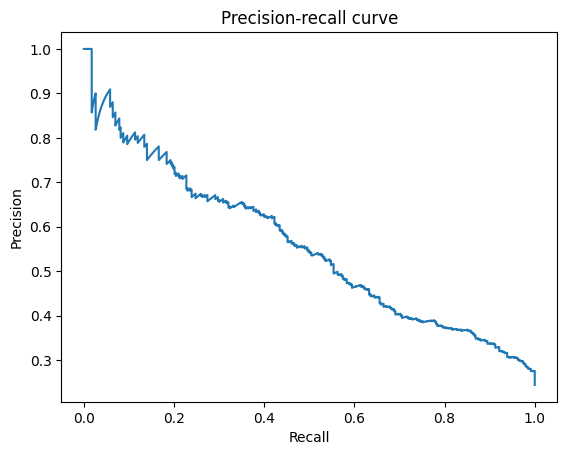

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_val, val_analysis['predict_proba'])


plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()